### Import dependencies

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

We are going to create 40 separable points using make_blobs function.
We will get 40 lines of data with 2 centers representing a yes or no 
answer and each group (x or y) will have 20 different pieces of data.
Then we will fit the data into the SVM algorithm with a linear kernel
since we only have 2 dimensions.

In [48]:
# First we create 40 separable points
x, y = make_blobs(n_samples=40, centers=2, random_state=20)

In [49]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x, y)

SVC(C=1, kernel='linear')

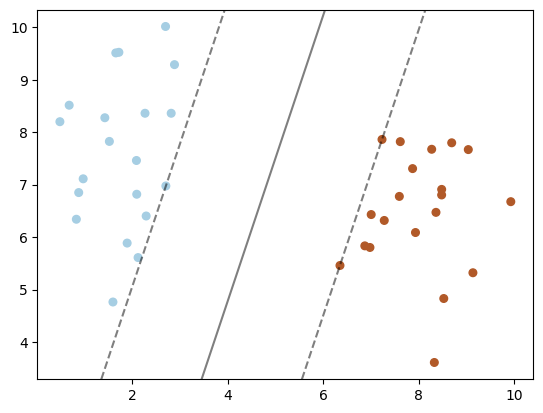

In [50]:
# display the data (one represents crocodiles and one represents alligators)
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()